# Prerequisites & Setup

In [59]:
#!pip install --upgrade py2neo
#!pip install matplotlib
import operator
import pandas
pandas.set_option('display.max_rows', 100)
from py2neo import Graph
graph = Graph(password="do-not-type-your-password-here")

# Graph Analytics
## What is in the graph?

In [72]:
query="match (n) where exists(n.type) return n.type, count(n)"
data_frame=graph.run(query).to_data_frame()
data_frame

,n.type,count(n)
0,publication,233556
1,researcher,58308
2,organisation,47092
3,dataset,1853


In [73]:
query="match (n)-[r]-(m) where exists(n.type) and exists(m.type) return n.type,m.type, count(r)"
data_frame=graph.run(query).to_data_frame()
data_frame

,n.type,m.type,count(r)
0,publication,publication,169782
1,researcher,publication,225953
2,publication,researcher,225953
3,organisation,researcher,151974
4,researcher,organisation,151974
5,researcher,dataset,373
6,dataset,researcher,373
7,publication,dataset,38
8,dataset,publication,38


## Number of publications

In [60]:
query="match (p:crossref) return p.title, p.doi, p.crossref_issue limit 1"
data_frame=graph.run(query).to_data_frame()
data_frame

,p.title,p.doi,p.crossref_issue
0,Analysis of human coronaviruses circulation,10.36233/0507-4088-2020-65-5-3,None


In [61]:
query="match (p:crossref:publication) return left(p.crossref_issued,4) as year, count(p) as count order by year DESC limit 15"
data_frame=graph.run(query).to_data_frame()
data_frame

,year,count
0,None,1067
1,2021,702
2,2020,139618
3,2019,600
4,2018,406
5,2017,360
6,2016,422
7,2015,366
8,2014,367
9,2013,344


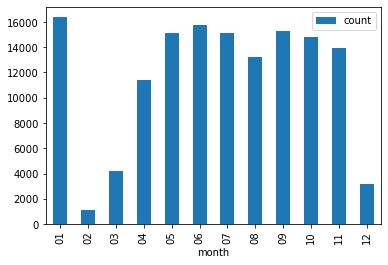

In [62]:
query="match (p:crossref:publication) where left(p.crossref_issued,4)='2020' return p.publication_month as month, count(p) as count order by month"
data_frame=graph.run(query).to_data_frame()
data_frame.plot.bar(x="month", y="count")

In [63]:
# Finding collaboration links between University of Melbourne and University of Oxford

In [64]:
query="match (org:organisation) where org.name='University of Melbourne' return org.key"
key1=graph.run(query).evaluate()

query="match (org:organisation) where org.name='University of Oxford' return org.key"
key2=graph.run(query).evaluate()

query="match (org1:organisation)--(r1:researcher)--(p:publication)--(r2:researcher)--(org2:organisation) where org1.key='{}' and org2.key='{}' return count(p)".format(key1,key2)

print(graph.run(query).evaluate())

228


In [65]:
query="""match (org1:organisation)-[r1]-(orcid1:orcid:researcher)-[r2]-(doi:publication)-[r3]-(orcid2:orcid:researcher)-[r4]-(org2:organisation) 
where org1.country=\"AU\" 
return org2.country, count(distinct(org2)) as count order by count DESC limit 10 """
data_frame=graph.run(query).to_data_frame()
data_frame

,org2.country,count
0,US,877
1,GB,748
2,AU,734
3,ES,304
4,DE,284
5,IT,265
6,IN,245
7,FR,219
8,CN,210
9,CA,131


In [66]:
query="""match (org1:organisation)-[r1]-(orcid1:orcid:researcher)-[r2]-(doi:publication)-[r3]-(orcid2:orcid:researcher)-[r4]-(org2:organisation) 
where org1.country=\"IN\" 
return org2.country, count(distinct(org2)) as count order by count DESC limit 10 """
data_frame=graph.run(query).to_data_frame()
data_frame

,org2.country,count
0,IN,2575
1,US,1076
2,GB,567
3,ES,223
4,DE,201
5,IT,193
6,AU,171
7,FR,138
8,CN,123
9,BR,120


# Export Graphs

In [67]:
cmd="""call apoc.export.graphml.query('
match (org1:organisation)-[r1]-(orcid1:orcid:researcher)-[r2]-(doi:publication)-[r3]-(orcid2:orcid:researcher)-[r4]-(org2:organisation) 
where org1.country=\"AU\" 
return org1,org2,orcid1,orcid2,doi,
r1,r2,r3,r4',
'AU-Graph.graphml',
{})"""
graph.run(cmd)

 file             | source                               | format  | nodes | relationships | properties | time |  rows | batchSize | batches | done | data 
------------------|--------------------------------------|---------|-------|---------------|------------|------|-------|-----------|---------|------|------
 AU-Graph.graphml | statement: nodes(13687), rels(25734) | graphml | 13687 |         25734 |     248601 |  487 | 39421 |        -1 |       0 | true | null 

In [68]:
cmd="""call apoc.export.graphml.query('
match (org1:organisation)-[r1]-(orcid1:orcid:researcher)-[r2]-(doi:publication)-[r3]-(orcid2:orcid:researcher)-[r4]-(org2:organisation) 
where org1.country=\"US\" 
return org1,org2,orcid1,orcid2,doi,
r1,r2,r3,r4',
'US-Graph.graphml',
{})"""
graph.run(cmd)

 file             | source                                | format  | nodes | relationships | properties | time |   rows | batchSize | batches | done | data 
------------------|---------------------------------------|---------|-------|---------------|------------|------|--------|-----------|---------|------|------
 US-Graph.graphml | statement: nodes(49419), rels(104708) | graphml | 49419 |        104708 |     947706 | 1849 | 154127 |        -1 |       0 | true | null 